This notebook presents the observing history of radio sources as seen from the coordinate time series.

In [1]:
from astropy.table import Table, setdiff, join
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
%matplotlib inline

In [2]:
# ts_stats = Table.read("../logs/ts_stat_20210315.log", format="ascii")
# ts_stats = Table.read("../logs/ts_stat_nju_20210531.log", format="ascii")
ts_stats = Table.read("../logs/ts_stat_nju_20210608.log", format="ascii")

nses = ts_stats["num_ses"]
dt = ts_stats["obs_len"]

In [3]:
# A special check on the ICRF3 defining sources
def_sou = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

def_sou_stats = join(ts_stats, def_sou, keys="iers_name")

def_nses = def_sou_stats["num_ses"]
def_dt = def_sou_stats["obs_len"]

In [4]:
from my_progs.catalog.read_icrf import read_icrf3

icrf3sx = read_icrf3(wv="sx")

icrf3sx.keep_columns(["iers_name"])

N_com = len(join(icrf3sx, ts_stats))

print("There are {:d} sources, {:d} in common with the ICRF3 S/X catalogs, "
      "including {} ICRF3 defning sources.".format(len(ts_stats), N_com, len(def_sou_stats)))

There are 5186 sources, 4427 in common with the ICRF3 S/X catalogs, including 294 ICRF3 defning sources.


Then plot the distribution of number of sessions.

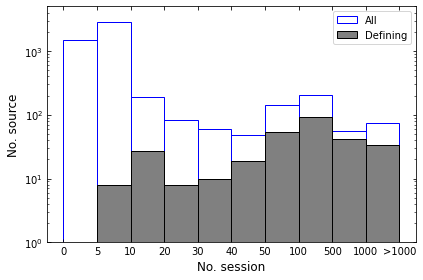

In [5]:
bins = [0, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 1e8]
num, loc = np.histogram(nses, bins=bins)
def_num, def_loc = np.histogram(def_nses, bins=bins)

loclabel = []
for loci in loc[:-1]:
    loclabel.append("%.0f" % loci)

loclabel.append(">1000")
    
# Plot the histogram of No. session.
fig, ax = plt.subplots()

xloc = np.arange(len(num))
ax.bar(xloc, num, fill=False, align="edge", edgecolor="b", label="All",
       width=1)
ax.bar(xloc, def_num, color="grey", align="edge", edgecolor="k", label="Defining",
       width=1)

ax.set_xticks(np.arange(len(num)+1))
ax.set_xticklabels(loclabel)
ax.set_yscale("log")
ax.set_ylim([1, 5000])
ax.set_xlabel("No. session", fontsize=12)
ax.set_ylabel("No. source", fontsize=12)
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/no_sess.eps")

In [6]:
print("The min, median, and max number of sessions for all sources are ", 
      np.min(nses), "and", np.median(nses), "and", np.max(nses))
print("The min, median, and max number of sessions for defining sources are ", 
      np.min(def_nses), "and", np.median(def_nses), "and", np.max(def_nses))

The min, median, and max number of sessions for all sources are  1 and 5.0 and 4932
The min, median, and max number of sessions for defining sources are  4 and 144.5 and 4932


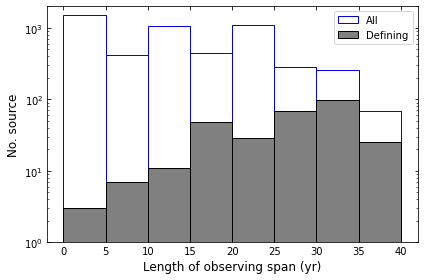

In [7]:
bins = np.arange(0, 41, 5)
num, loc = np.histogram(dt, bins=bins)
def_num, def_loc = np.histogram(def_dt, bins=bins)

loclabel = []
for loci in loc:
    loclabel.append("%.0f" % loci)

# Plot the histogram of No. session.
fig, ax = plt.subplots()

# xloc = np.arange(len(num))
ax.hist(dt, bins=bins, histtype="bar", edgecolor="b", label="All", fill=False)
ax.hist(def_dt, bins=bins, histtype="bar", color="grey", edgecolor="k", label="Defining")

ax.set_yscale("log")
ax.set_xlabel("Length of observing span (yr)", fontsize=12)
ax.set_ylabel("No. source", fontsize=12)
ax.set_ylim([1, 2000])
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/len_obs_time.eps")

In [8]:
print("The shortest and longest observing time span for all sources are ",
      dt.min(), "yr and", dt.max(), "yr")
print("The shortest and longest observing time span for defining sources are ",
      def_dt.min(), "yr and", def_dt.max(), "yr")

The shortest and longest observing time span for all sources are  0.0 yr and 41.5 yr
The shortest and longest observing time span for defining sources are  4.1 yr and 41.5 yr


In [9]:
print("The earliest and lastest observations for all sources "
      "are made at {:.2f} and {:.2f}.".format(
      ts_stats["beg_epoch"].min(), ts_stats["end_epoch"].max()))

The earliest and lastest observations for all sources are made at 1979.90 and 2021.48.


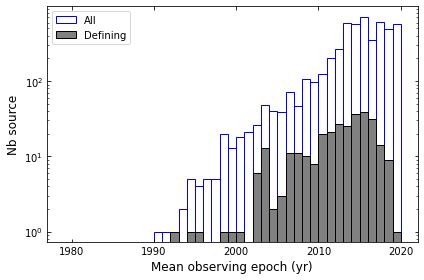

In [10]:
bins = np.arange(1979, 2021, 1)
num, loc = np.histogram(dt, bins=bins)
def_num, def_loc = np.histogram(def_dt, bins=bins)

# loclabel = []
# for loci in loc:
#     loclabel.append("%.0f" % loci)

# Plot the histogram of Mean epoch
fig, ax = plt.subplots()

# # xloc = np.arange(len(num))
ax.hist(ts_stats["mean_epoch"], bins=bins, histtype="bar", edgecolor="b", label="All", fill=False)
ax.hist(def_sou_stats["mean_epoch"], bins=bins, histtype="bar", color="grey", edgecolor="k", label="Defining")

ax.set_yscale("log")
ax.set_xlabel("Mean observing epoch (yr)", fontsize=12)
ax.set_ylabel("Nb source", fontsize=12)
# ax.set_ylim([1, 2000])
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/len_obs_time.eps")

In [11]:
print("The median vaule of mean observing epoch for all sources is {:.2f}, "
      "and {:.2f} for the defining sources.".format(
      np.median(ts_stats["mean_epoch"]), np.median(def_sou_stats["mean_epoch"])))

The median vaule of mean observing epoch for all sources is 2015.20, and 2013.32 for the defining sources.
